In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as md
%matplotlib inline

In [2]:
# Define plot style
style_file_name = 'fig.style'
s = """
axes.linewidth:     1.0     # edge linewidth
font.size:          7.0  
axes.labelsize:     7.0  # fontsize of the x any y labels
axes.titlesize:     7.0  # fontsize of the titles
xtick.labelsize:    7.0  # fontsize of the xtick labels
ytick.labelsize:    7.0  # fontsize of the ytick labels
legend.fontsize:      7.0
legend.borderpad:     0.2  # border whitespace
legend.labelspacing:  0.2  # the vertical space between the legend entries
legend.borderaxespad: 0.2  # the border between the axes and legend edge
axes.labelpad:      1.0     # space between label and axis
figure.dpi: 600
"""
with open(style_file_name, 'w') as f:
    f.write(s)
    
plt.style.use(style_file_name)

In [3]:
# Load risdiplam dihedrals
traj_rsd_file = '../data/molecular_dynamics_simulations/22.12.18_risdiplam.xtc'
top_rsd_file = '../data/molecular_dynamics_simulations/22.12.18_risdiplam.pdb'

traj_r = md.load(traj_rsd_file,top=top_rsd_file)
top_r = traj_r.topology

r1_idx = top_r.select('name N6X or name C15X or name C13X or name C14X')
r1_data = md.compute_dihedrals(traj_r,[r1_idx])

r2_idx = top_r.select('name C8X or name C7X or name N2X or name C4X')
r2_data = md.compute_dihedrals(traj_r,[r2_idx])

In [4]:
# Load branaplam dihedrals
traj_bnp_file = '../data/molecular_dynamics_simulations/22.12.18_branaplam_enol.xtc'
top_bnp_file = '../data/molecular_dynamics_simulations/22.12.18_branaplam_enol.pdb'

traj_b = md.load(traj_bnp_file,top=top_bnp_file)
top_b = traj_b.topology

b1_idx = top_b.select('name C22X or name C20X or name C17X or name C18X')
b1_data = md.compute_dihedrals(traj_b,[b1_idx])

b2_idx = top_b.select('name C15X or name C14X or name C13X or name N3X')
b2_data = md.compute_dihedrals(traj_b,[b2_idx])

b3_idx = top_b.select('name N2X or name C10X or name O1X or name C5X')
b3_data = md.compute_dihedrals(traj_b,[b3_idx])

b4_idx = top_b.select('name C10X or name O1X or name C5X or name C4X')
b4_data = md.compute_dihedrals(traj_b,[b4_idx])

In [5]:
def draw(values, ax, title, color):
    xlim = (-np.pi, np.pi)
    #angles = pd.read_csv(file_name, header=None).values
    ax.hist(values, bins=100, range=xlim, density=True, color=color)
    ax.set_yticks([])
    ax.set_xlim(xlim)
    ax.set_ylim([0,.5])
    ax.set_yticks([0, .5])
    ax.set_xticks([-np.pi, 0, np.pi])
    ax.set_xticklabels(['$-\pi$', '$0$','$+\pi$'], rotation=0)
    ax.set_title(title)
    #ax.set_xlabel('(rad)')

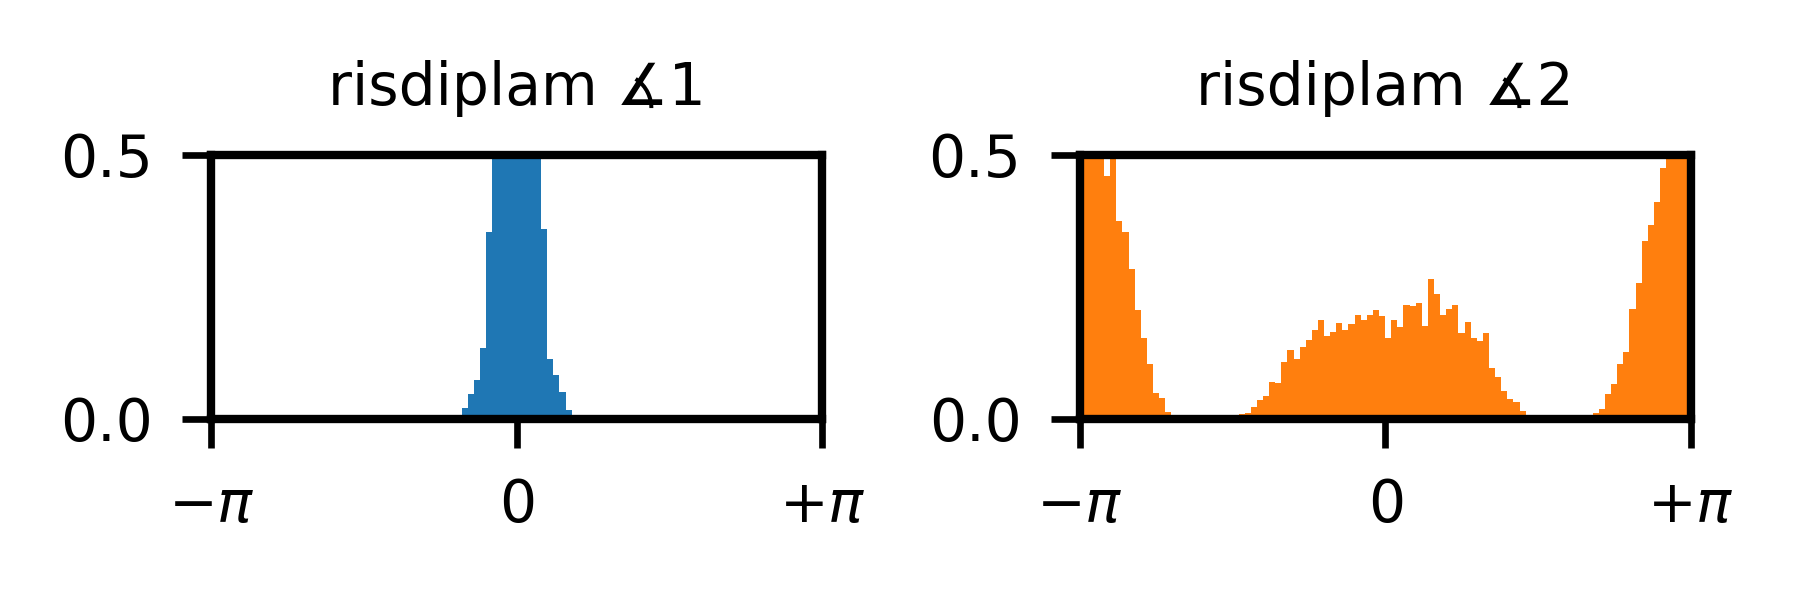

In [6]:
#
# Fig 4 S1 A
#
fig, axs = plt.subplots(1,2, figsize=[3,1], sharey=False)

draw(ax=axs[0],
     values=r1_data,
     title=u'risdiplam ∡1',
     color='C0')

draw(ax=axs[1],
     values=r2_data,
     title=u'risdiplam ∡2',
     color='C1')
    
fig.tight_layout()
fig.savefig('figS13A.pdf')

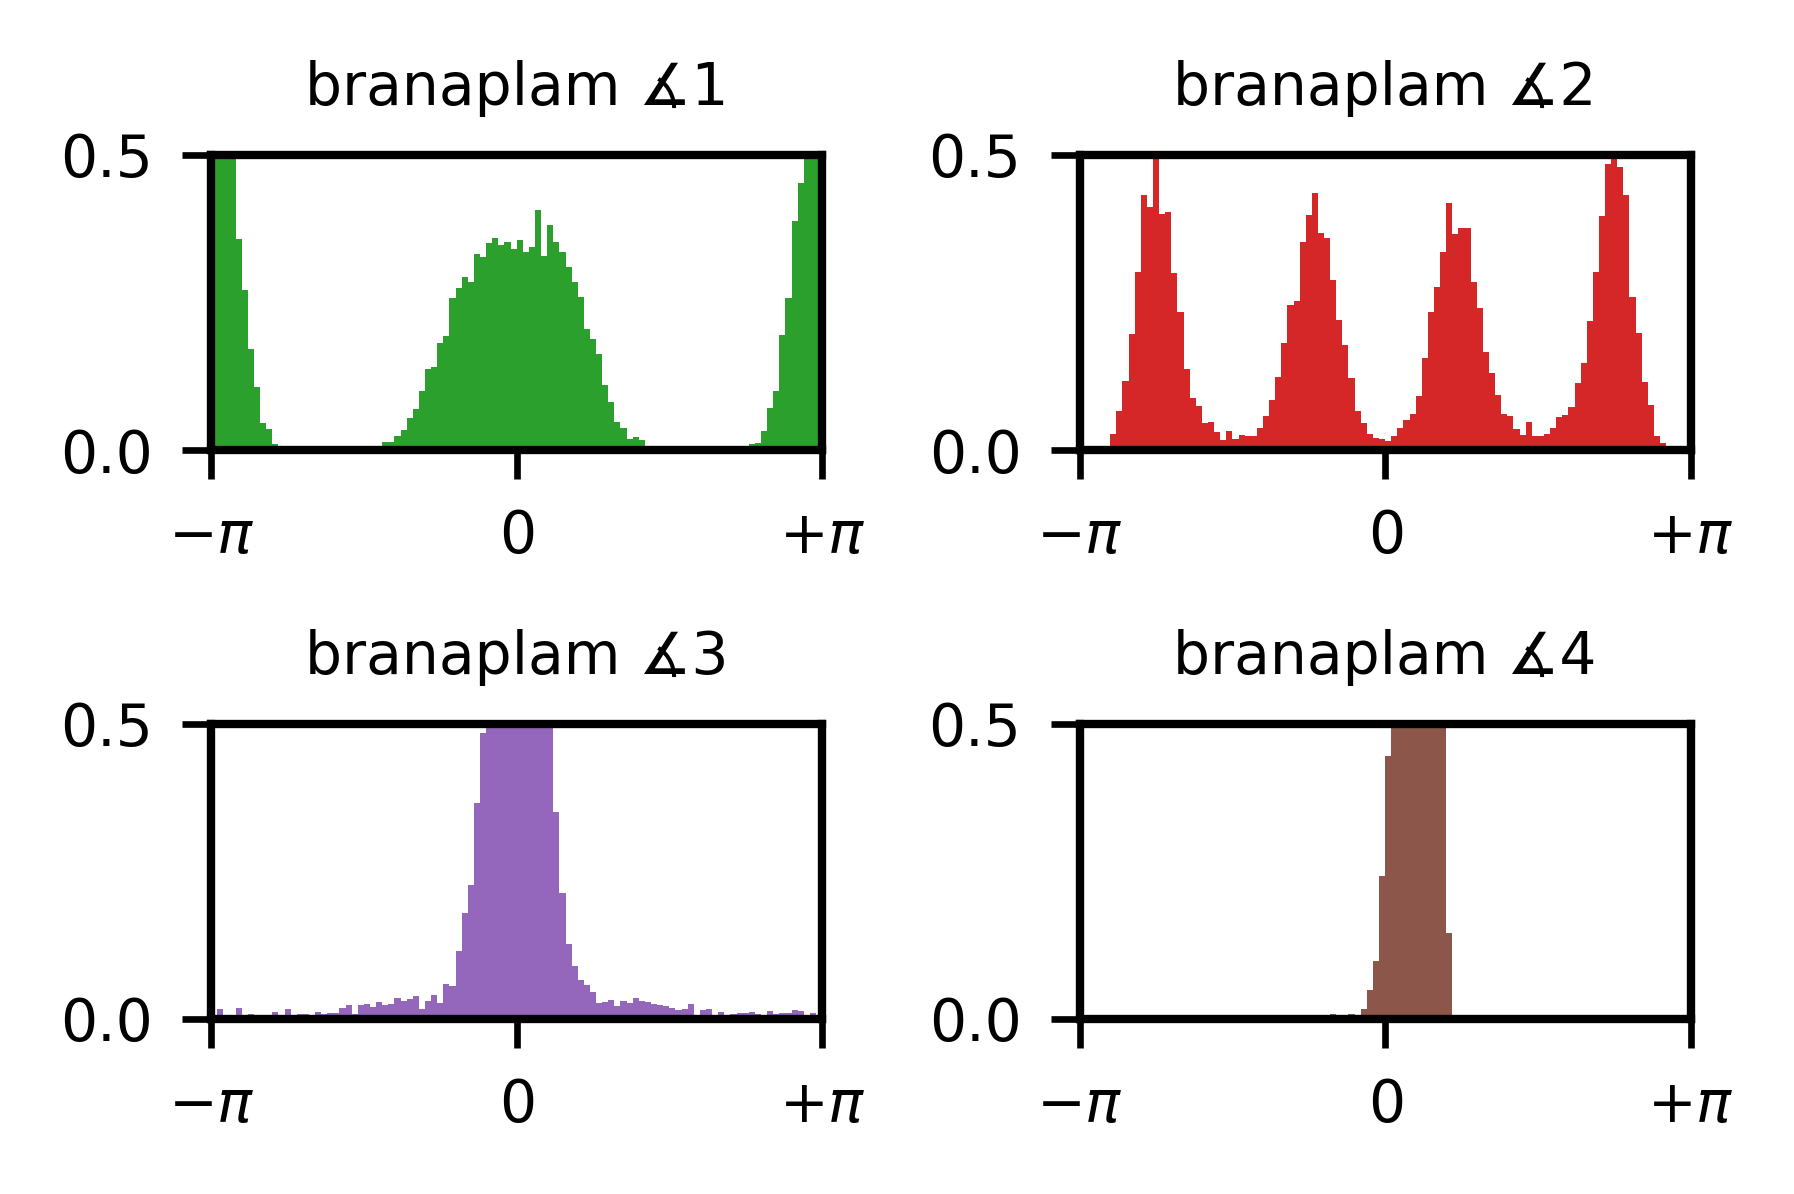

In [7]:
#
# Fig 4 S1 B
#
fig, axs = plt.subplots(2,2, figsize=[3,2], sharey=False)
axs = axs.ravel()

draw(ax=axs[0],
     values=b1_data,
     title=u'branaplam ∡1',
     color='C2')

draw(ax=axs[1],
     values=b2_data,
     title=u'branaplam ∡2',
     color='C3')

draw(ax=axs[2],
     values=b3_data,
     title=u'branaplam ∡3',
     color='C4')

draw(ax=axs[3],
     values=b4_data,
     title=u'branaplam ∡4',
     color='C5')
    
fig.tight_layout()
fig.savefig('figS13B.pdf')